## Observations and Insights 

1. This study compares the reduction of tumor volume from a standard tumor size. 
2. This study employs an almost 50/50 split of male and female mice.
3. Capomulin and Ramicane significantly reduce tumor volume compared to other treatments. 
4. The final size of the tumor is correlated to the final weight of the mouse. 

In [55]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

mouse_study = pd.merge(mouse_metadata, study_results, how = "outer")

# Display the data table for preview
mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [56]:
# Checking the number of mice.

mice_names = mouse_study["Mouse ID"].unique()
mice_count = len(mice_names)
print(mice_count)
print(mice_names)


249
['k403' 's185' 'x401' 'm601' 'g791' 's508' 'f966' 'm546' 'z578' 'j913'
 'u364' 'n364' 'y793' 'r554' 'm957' 'c758' 't565' 'a644' 'i177' 'j989'
 'i738' 'a520' 'w914' 'r811' 'g288' 'i334' 'q610' 'd251' 'l897' 'c458'
 'b742' 'b128' 'j246' 'a411' 'j119' 'w150' 'v923' 'g316' 's710' 'l509'
 'r944' 'e662' 'u196' 'q597' 'a444' 'i557' 'r921' 'w678' 'y449' 'a203'
 'a251' 'a262' 'a275' 'a366' 'a401' 'a457' 'a492' 'a577' 'a685' 'a699'
 'a788' 'a818' 'a897' 'a963' 'b313' 'b447' 'b487' 'b559' 'b759' 'b879'
 'c139' 'c264' 'c282' 'c302' 'c326' 'c402' 'c559' 'c580' 'c757' 'c766'
 'c819' 'c832' 'c895' 'c927' 'd133' 'd164' 'd474' 'e213' 'e227' 'e291'
 'e476' 'e584' 'f129' 'f234' 'f278' 'f345' 'f394' 'f436' 'f545' 'f932'
 'f993' 'g107' 'g296' 'g497' 'g558' 'g570' 'g867' 'g989' 'h246' 'h333'
 'h428' 'h531' 'i386' 'i477' 'i635' 'i669' 'i901' 'j235' 'j296' 'j365'
 'j755' 'j984' 'k210' 'k382' 'k483' 'k510' 'k603' 'k754' 'k804' 'k862'
 'k894' 'l215' 'l264' 'l471' 'l490' 'l558' 'l661' 'l700' 'l725' 'l733'
 '

In [57]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_list = pd.Series(mice_names, dtype=object,  name = "mouse")
mice_list

0      k403
1      s185
2      x401
3      m601
4      g791
       ... 
244    z314
245    z435
246    z581
247    z795
248    z969
Name: mouse, Length: 249, dtype: object

In [58]:
# Optional: Get all the data for the duplicate mouse ID. 

In [59]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_df = mouse_study.drop_duplicates(subset = "Mouse ID", keep = 'last')
mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [60]:
# Checking the number of mice in the clean DataFrame.
print("There are " + str(len(mouse_study_df["Mouse ID"].unique())) + " mice in this study.")

There are 249 mice in this study.


## Summary Statistics

In [61]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

#grouped_drug = mouse_study_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].count()
grouped_drug_means = mouse_study_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
grouped_drug_medians =  mouse_study_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
grouped_drug_variance =  mouse_study_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
grouped_drug_deviations =  mouse_study_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
grouped_drug_SEMs =  mouse_study_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

Drug_Regimen_Summary_stats = pd.DataFrame({"Mean": grouped_drug_means, 
                                          "Median": grouped_drug_medians, 
                                          "Variance": grouped_drug_variance, 
                                          "Standard Deviation": grouped_drug_deviations, 
                                          "SEM": grouped_drug_SEMs})
Drug_Regimen_Summary_stats


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.736964,55.841410,69.349002,8.327605,1.665521
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


In [62]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

Drug_Regimen_Summary_One_Step = mouse_study_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
Drug_Regimen_Summary_One_Step

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.736964,55.841410,69.349002,8.327605,1.665521
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


## Bar and Pie Charts

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

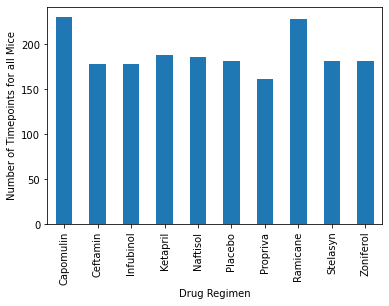

In [63]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timept_data = mouse_study.groupby(["Drug Regimen"])["Mouse ID"].count()
timept_data_pan_plt = timept_data.plot(kind ="bar")
timept_data_pan_plt.set_xlabel("Drug Regimen")
timept_data_pan_plt.set_ylabel("Number of Timepoints for all Mice")

timept_data

Text(0.5, 1.0, 'Total Timepoints per Drug Regimen')

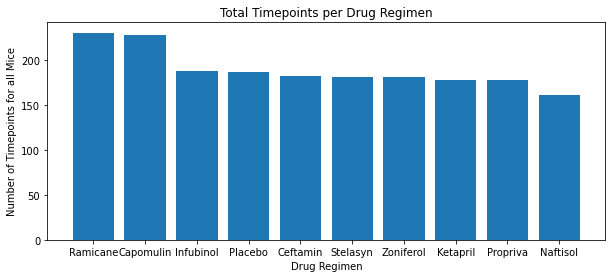

In [64]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
mouse_counts = mouse_study["Drug Regimen"].value_counts()
plt.figure(figsize=(10,4))
timept_data_pyplt = plt.bar(mouse_study["Drug Regimen"].unique(), mouse_counts)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints for all Mice")
plt.title("Total Timepoints per Drug Regimen")

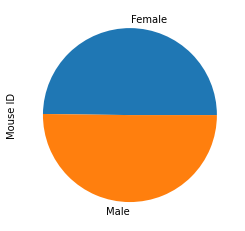

In [65]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_counts = mouse_study_df.groupby(["Sex"])["Mouse ID"].count()
sex_counts_pan_pie = sex_counts.plot(kind = "pie")


<function matplotlib.pyplot.show(close=None, block=None)>

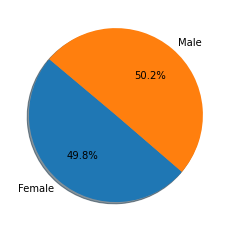

In [66]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
sex_counts_pypie = plt.pie(sex_counts, labels=labels, autopct="%1.1f%%", shadow=True, startangle=140)
plt.show

## Quartiles, Outliers and Boxplots

In [67]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

mouse_study_df



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [68]:
# Put treatments into a list for for loop (and later for plot labels)
Treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
Tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 


    
    # Locate the rows which contain mice on each drug and get the tumor volumes

for i in Treatment: 
    temp_df = mouse_study_df.loc[(mouse_study_df["Drug Regimen"] == i)]
    Tumor_vol.append(temp_df["Tumor Volume (mm3)"])

    quartiles = temp_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq    

    print(f"The lower quartile of {i} is: {lowerq}")
    print(f"The upper quartile of {i} is: {upperq}")
    print(f"The interquartile range of {i} is: {iqr}")
    print(f"The the median of {i} is: {quartiles[0.5]} ")
#print(Tumor_vol)
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The the median of Infubinol is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
The lower quartile of Ceftamin is: 48.72207785
The upper quartile of Ceftamin is: 64.29983003
The interquartile rang

<function matplotlib.pyplot.show(close=None, block=None)>

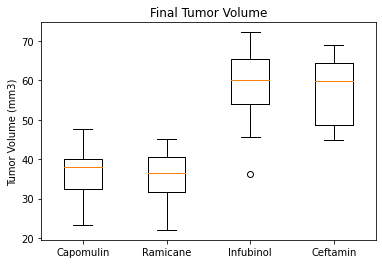

In [69]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(Tumor_vol)
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show

## Line and Scatter Plots

<function matplotlib.pyplot.show(close=None, block=None)>

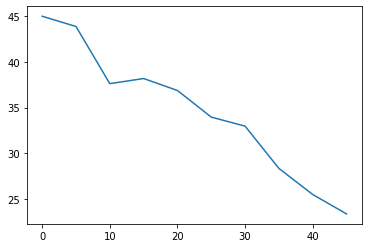

In [70]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

s185 = mouse_study.loc[(mouse_study["Mouse ID"] == "s185")]
tumor_vol = s185["Timepoint"]
time_pt = s185["Tumor Volume (mm3)"]
plt.plot(tumor_vol, time_pt)
plt.show

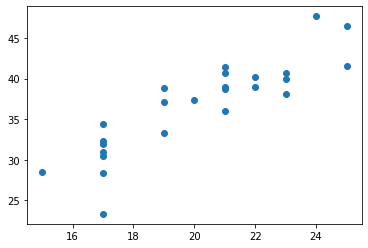

In [71]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin = mouse_study_df.loc[(mouse_study["Drug Regimen"] == "Capomulin")]
Cap_tumor_vol = Capomulin["Tumor Volume (mm3)"]
Cap_weight = Capomulin["Weight (g)"]
plt.scatter(Cap_weight, Cap_tumor_vol)

## Correlation and Regression

The correlation between both factors is 0.88
y = 1.75x + 1.45


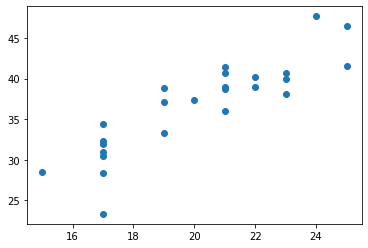

In [80]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(Cap_weight, Cap_tumor_vol)
(slope, intercept, rvalue, pvalue, stderr) = linregress(Cap_weight, Cap_tumor_vol)
regress_values = Cap_weight * slope + intercept
plt.scatter(Cap_weight, Cap_tumor_vol)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(line_eq)
